In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split 
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
%matplotlib inline

In [3]:
train_data = pd.read_csv('train.csv')
train_data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,4.963726e-02,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,7.577876e-02,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,7.122317e-03,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [4]:
test_data = pd.read_csv('test.csv')
test_data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,NaN,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


In [4]:
train, valid = train_test_split(train_data, test_size=0.2, random_state=15)

Train

In [5]:
def fill_life_square(df):
    df['LifeSquare'] = df['LifeSquare'].fillna(0.8 * df['Square'])
    return df

In [6]:
def clean_rooms(df, source_df):
    rooms_median = source_df['Rooms'].median()
    df.loc[df['Rooms'] >= 6, 'Rooms'] = rooms_median
    return df

In [7]:
def get_cat_features(df):
    df.loc[df['Ecology_2']=='A', 'Ecology_2'] = 1
    df.loc[df['Ecology_2']=='B', 'Ecology_2'] = 2
    df = pd.get_dummies(df)
    return df

In [8]:
def prepare_data(df):
    df = clean_rooms(df, df)
    df = fill_life_square(df)
    df = get_cat_features(df)
    return df

In [9]:
train = prepare_data(train)

In [10]:
valid = prepare_data(valid)

In [11]:
fts = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Social_1', 'Social_2', 'Social_3','Helthcare_2',
       'Shops_1', 'Ecology_3_A', 'Shops_2_A']

Model

In [12]:
from sklearn.ensemble import RandomForestRegressor as RF

In [13]:
model = RF(n_estimators=100, max_depth=50, max_features=12, random_state=42)

In [14]:
model.fit(train.loc[:, fts], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=12, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [15]:
pred_train = model.predict(train.loc[:, fts])

(array([  80.,  176.,  463.,  747.,  958., 1237., 1051.,  753.,  578.,
         405.,  295.,  199.,  219.,  181.,  144.,  121.,   90.,   77.,
          53.,   65.,   33.,   31.,   24.,   11.,    9.]),
 array([ 62882.89202423,  83606.03394754, 104329.17587085, 125052.31779417,
        145775.45971748, 166498.60164079, 187221.74356411, 207944.88548742,
        228668.02741073, 249391.16933405, 270114.31125736, 290837.45318068,
        311560.59510399, 332283.7370273 , 353006.87895062, 373730.02087393,
        394453.16279724, 415176.30472056, 435899.44664387, 456622.58856718,
        477345.7304905 , 498068.87241381, 518792.01433712, 539515.15626044,
        560238.29818375, 580961.44010706]),
 <a list of 25 Patch objects>)

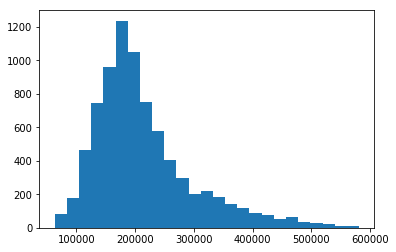

In [16]:
plt.hist(pred_train, bins=25)

In [17]:
pred_valid = model.predict(valid.loc[:, fts])

(array([ 26.,  28.,  94., 141., 233., 257., 283., 203., 179., 118.,  81.,
         62.,  60.,  46.,  42.,  42.,  26.,  20.,  15.,  18.,  11.,   6.,
          4.,   4.,   1.]),
 array([ 67472.15899842,  86185.43638964, 104898.71378086, 123611.99117208,
        142325.2685633 , 161038.54595452, 179751.82334574, 198465.10073696,
        217178.37812818, 235891.6555194 , 254604.93291062, 273318.21030184,
        292031.48769306, 310744.76508428, 329458.0424755 , 348171.31986672,
        366884.59725794, 385597.87464916, 404311.15204038, 423024.4294316 ,
        441737.70682282, 460450.98421404, 479164.26160526, 497877.53899648,
        516590.8163877 , 535304.09377892]),
 <a list of 25 Patch objects>)

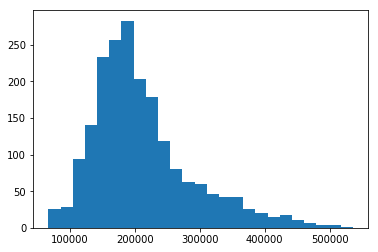

In [18]:
plt.hist(pred_valid, bins=25)

In [19]:
from sklearn.metrics import r2_score as r2

In [20]:
r2(train['Price'], pred_train)

0.9628297536603225

In [21]:
r2(valid['Price'], pred_valid)

0.7214754427405641

TEST DATASET

In [22]:
preparedfortest = prepare_data(test_data)

In [23]:
preparedfortest['Price']= model.predict(preparedfortest.loc[:, fts])

Визуальное распределение предсказанных цен на недвижимость

(array([ 54.,  74., 202., 376., 574., 793., 671., 532., 399., 262., 234.,
        144., 143., 133.,  99.,  80.,  58.,  63.,  30.,  32.,  15.,  19.,
          8.,   3.,   2.]),
 array([ 64715.27855473,  84654.40798017, 104593.53740562, 124532.66683106,
        144471.7962565 , 164410.92568194, 184350.05510739, 204289.18453283,
        224228.31395827, 244167.44338371, 264106.57280915, 284045.7022346 ,
        303984.83166004, 323923.96108548, 343863.09051092, 363802.21993637,
        383741.34936181, 403680.47878725, 423619.60821269, 443558.73763814,
        463497.86706358, 483436.99648902, 503376.12591446, 523315.2553399 ,
        543254.38476535, 563193.51419079]),
 <a list of 25 Patch objects>)

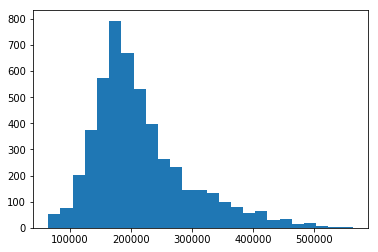

In [24]:
plt.hist(preparedfortest['Price'], bins=25)

In [25]:
preparedfortest.loc[:,['Id', 'Price']].to_csv('ABuydalin_predictions.csv', index=False)